<a href="https://colab.research.google.com/github/kiboiWanjohi/scotep-kenya/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/Stat_Docs/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Change permission
! chmod 600 ~/.kaggle/kaggle.json

### Try Downloading Dataset

Link to dataset https://www.kaggle.com/datasets/cheddad/miniddsm2?resource=download-directory



In [10]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                       3MB  2024-08-09 17:52:25           2726         62  1.0              
arpit2712/amazonsalesreport                                    AmazonSalesReport                                    3MB  2024-08-07 19:15:47           1591         29  1.0              
muhammadehsan000/global-electric-vehicle-sales-data-2010-2024  Global Electric Vehicle Sales Data (2010-2024)      83KB  2024-08-09 16:39:22           2070         41  1.0              
emreksz/software-engineer-jobs-and-salaries-2024               Softwar

In [11]:
!kaggle datasets download -d cheddad/miniddsm2

Dataset URL: https://www.kaggle.com/datasets/cheddad/miniddsm2
License(s): Attribution-NoDerivatives 4.0 International (CC BY-ND 4.0)
100% 49.1G/49.1G [11:04<00:00, 87.4MB/s]
100% 49.1G/49.1G [11:04<00:00, 79.3MB/s]


In [13]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   80G   28G  75% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  532K  6.4G   1% /var/colab
/dev/sda1       114G   82G   33G  72% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.7G   13G  18% /content/drive


In [16]:
cd '/content/miniddsm2.zip'

[Errno 20] Not a directory: '/content/miniddsm2.zip'
/content


In [19]:
!unzip "/content/miniddsm2.zip"

Archive:  /content/miniddsm2.zip
replace Data-MoreThanTwoMasks/Benign/0236/C_0236_1.RIGHT_CC_Mask3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import pandas as pd

In [21]:
dicom_data = pd.read_excel('/content/Data-MoreThanTwoMasks/Data-MoreThanTwoMasks.xlsx')

In [22]:
dicom_data.head()

,fullPath,fileName,View,Side,Status,Age,Density,Tumour_Contour,Tumour_Contour2,Tumour_Contour3,Tumour_Contour4,Tumour_Contour5,Tumour_Contour6
0,Benign\0029\C_0029_1.LEFT_CC.png,C_0029_1.LEFT_CC.png,CC,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_CC_Mask.png,-,NaN,NaN,NaN,NaN
1,Benign\0029\C_0029_1.LEFT_MLO.png,C_0029_1.LEFT_MLO.png,MLO,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_MLO_Mask.png,-,NaN,NaN,NaN,NaN
2,Benign\0029\C_0029_1.RIGHT_CC.png,C_0029_1.RIGHT_CC.png,CC,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN
3,Benign\0029\C_0029_1.RIGHT_MLO.png,C_0029_1.RIGHT_MLO.png,MLO,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN
4,Benign\0033\C_0033_1.LEFT_CC.png,C_0033_1.LEFT_CC.png,CC,LEFT,Benign,60.0,3,-,-,NaN,NaN,NaN,NaN


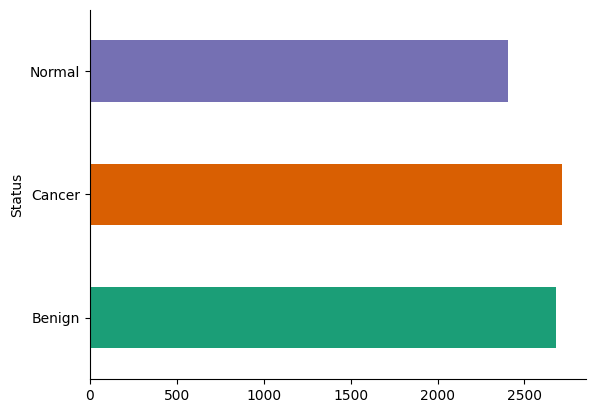

In [23]:
# title Status

from matplotlib import pyplot as plt
import seaborn as sns
dicom_data.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
def Normalization(image):
  normalized_image = (image - image.min()) / (image.max() - image.min())
  return normalized_image

In [ ]:
cancer =